# Invertibility
When can't we recover the "true filter"?

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import toeplitz

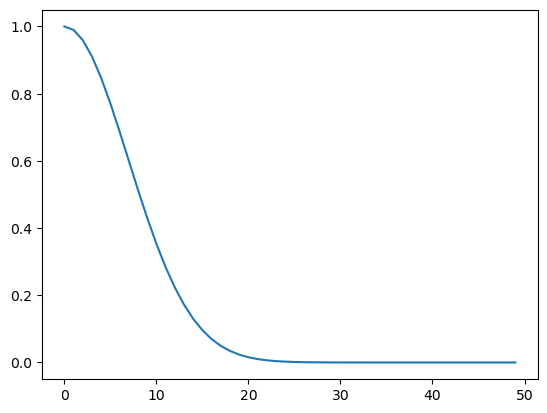

In [6]:
n_f = 50
def gauss(x, mu, sigma):
    return np.exp(-((x-mu)/sigma)**2)
tfilter = gauss(np.linspace(0,5,n_f),0,1)
plt.plot(tfilter)

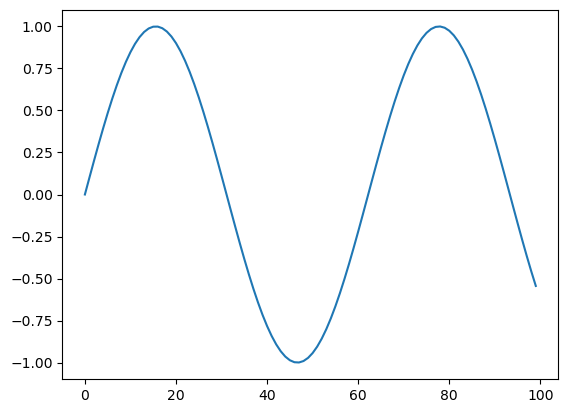

In [7]:
n_s = 100
s = np.sin(np.linspace(0,10,n_s))
plt.plot(s)

In [9]:
def relu(x):
  return np.maximum(0.0, x)

def filter_stimulus(s, tfilter, b_relu=True, b_poisson=False):
    n_s = len(s)
    n_f = len(tfilter)

    # Create design matrix
    S = np.zeros((n_s, n_f))
    S[n_f-1:, :] = toeplitz(s[n_f-1:], s[:n_f][::-1])

    # Convolve stimulus with filter
    r = np.dot(S, tfilter)

    if b_relu:
        r = relu(r)
    if b_poisson:
        print('Poisson not implemented')
    
    return r

In [10]:
r = filter_stimulus(s, tfilter, b_relu=False)

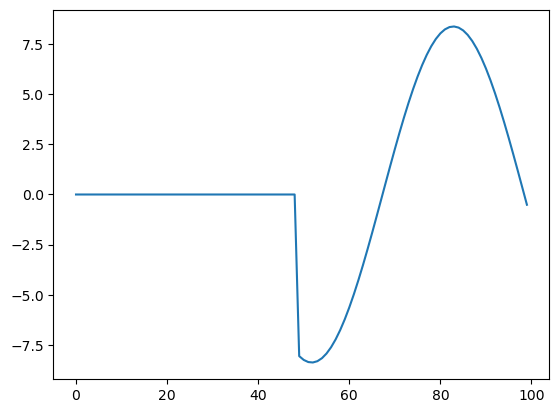

In [11]:
plt.plot(r)

In [20]:
s[-1] * tfilter[0]

-0.5440211108893699

In [22]:
r[-1]

-0.5112792288643514

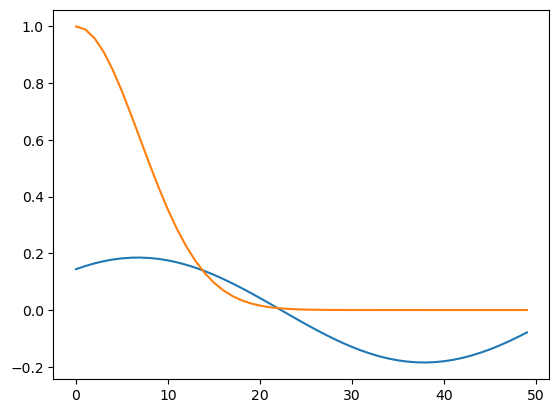

In [12]:
def reverse_corr(r, s, n_f=51, b_method='loop'):
    # Function to compute reverse correlation
    n_s = len(r)
    # Create design matrix
    S = np.zeros((n_s, n_f))
    S[n_f-1:, :] = toeplitz(s[n_f-1:], s[:n_f][::-1])

    if b_method=='loop':
        sta = np.zeros(n_f)
        for idx_f in range(n_f):
            sta[idx_f] = np.dot(S[:,idx_f], r)
        
    return sta

sta = reverse_corr(r, s, n_f)
plt.plot(sta/np.linalg.norm(sta))
plt.plot(tfilter)